In [127]:
import numpy as np
import tensorflow as tf

with open("Part1_x_y_Values.txt") as f:
    data = [[float(i[0]), float(i[1])] for i in [i[1:-1].split(',') for i in f.read().split("\n")] if len(i) > 1]
    x = np.array([i[0] for i in data]).astype(np.float32)
    y = np.array([i[1] for i in data]).astype(np.float32)

# Three Features Model

In [128]:
a = tf.Variable(tf.random.normal([1], dtype=tf.float32))
b = tf.Variable(tf.random.normal([1], dtype=tf.float32))
c = tf.Variable(tf.random.normal([1], dtype=tf.float32))

In [129]:
def model(x):
    return a * x * x + b * x + c

In [130]:
def loss_fn(y, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y))

In [131]:
def gradient_descent(x, y, a, b, c, lr, epochs):
    loss_hist = []
    history = []
    for i in range(epochs + 1):
        with tf.GradientTape() as tape:
            y_pred = model(x)
            cost = loss_fn(y, y_pred)
        gradients = tape.gradient(cost, [a, b, c])
        a.assign_sub(lr * gradients[0])
        b.assign_sub(lr * gradients[1])
        c.assign_sub(lr * gradients[2])
        if i % 50 == 0:
            print("Epochs: %d, Cost: %.4f, a: %.4f, b: %.4f, c: %.4f" % (i, cost.numpy(), a.numpy(), b.numpy(), c.numpy()))
        loss_hist.append(cost.numpy())
        history.append([a.numpy(), b.numpy(), c.numpy()])
    return loss_hist, history

In [132]:

loss_hist, history = gradient_descent(x, y, a, b, c, 0.0001, 500)

Epochs: 0, Cost: 351.0791, a: 0.4000, b: 0.0234, c: -2.1958


Epochs: 50, Cost: 98.0308, a: 0.1855, b: 0.1025, c: -2.1442
Epochs: 100, Cost: 95.3534, a: 0.1720, b: 0.2040, c: -2.0904
Epochs: 150, Cost: 92.8021, a: 0.1588, b: 0.3029, c: -2.0377
Epochs: 200, Cost: 90.3708, a: 0.1459, b: 0.3994, c: -1.9860
Epochs: 250, Cost: 88.0539, a: 0.1334, b: 0.4935, c: -1.9353
Epochs: 300, Cost: 85.8459, a: 0.1211, b: 0.5852, c: -1.8856
Epochs: 350, Cost: 83.7417, a: 0.1092, b: 0.6746, c: -1.8369
Epochs: 400, Cost: 81.7363, a: 0.0975, b: 0.7618, c: -1.7892
Epochs: 450, Cost: 79.8251, a: 0.0862, b: 0.8469, c: -1.7424
Epochs: 500, Cost: 78.0035, a: 0.0751, b: 0.9297, c: -1.6965


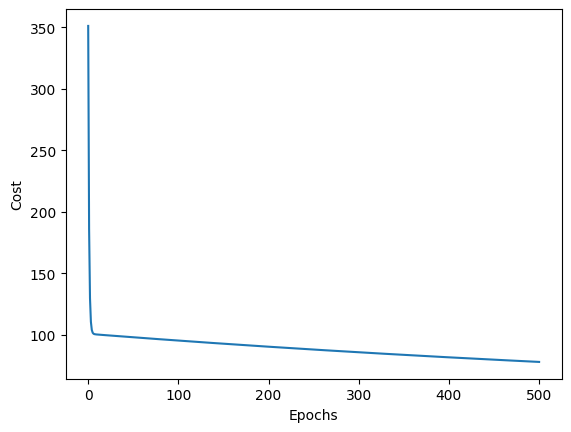

In [133]:
import matplotlib.pyplot as plt

plt.plot(loss_hist)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

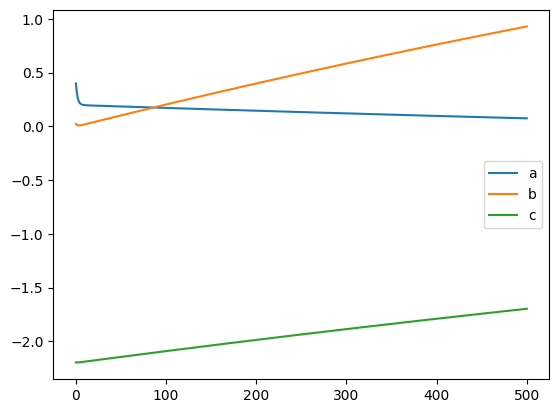

In [134]:
#plot the features over the epochs
plt.plot([i[0] for i in history], label='a')
plt.plot([i[1] for i in history], label='b')
plt.plot([i[2] for i in history], label='c')
plt.legend()


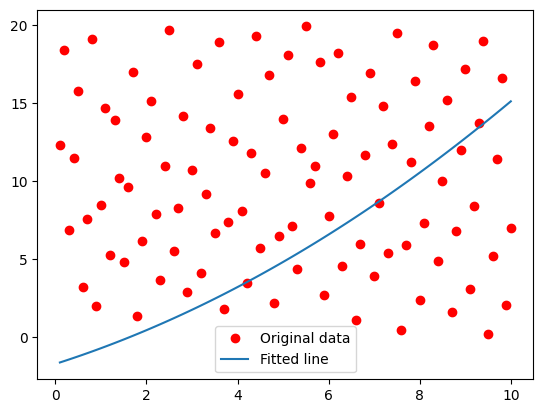

In [135]:
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, np.array(history[-1][0] * x * x + history[-1][1] * x + history[-1][2]), label='Fitted line')
plt.legend()

# Four features model

In [136]:
a = tf.Variable(tf.random.normal([1], dtype=tf.float32))
b = tf.Variable(tf.random.normal([1], dtype=tf.float32))
c = tf.Variable(tf.random.normal([1], dtype=tf.float32))
d = tf.Variable(tf.random.normal([1], dtype=tf.float32))

In [137]:
def cubic_model(x):
    return a * x * x * x + b * x * x + c * x + d

In [138]:
def gradient_descent_four(x, y, a, b, c, d, lr, epochs):
    loss_hist = []
    history = []
    for i in range(epochs + 1):
        with tf.GradientTape() as tape:
            y_pred = cubic_model(x)
            cost = loss_fn(y, y_pred)
        gradients = tape.gradient(cost, [a, b, c, d])
        a.assign_sub(lr * gradients[0])
        b.assign_sub(lr * gradients[1])
        c.assign_sub(lr * gradients[2])
        d.assign_sub(lr * gradients[3])
        if i % 100 == 0:
            print("Epochs: %d, Cost: %.4f, a: %.4f, b: %.4f, c: %.4f, d: %.4f" % (i, cost.numpy(), a.numpy(), b.numpy(), c.numpy(), d.numpy()))
        loss_hist.append(cost.numpy())
        history.append([a.numpy(), b.numpy(), c.numpy(), d.numpy()])
    return loss_hist, history

In [139]:
loss_hist, history = gradient_descent_four(x, y, a, b, c, d, 0.000001 , 300)

Epochs: 0, Cost: 63576.2109, a: 0.5224, b: -0.2452, c: -1.3333, d: -0.1854
Epochs: 100, Cost: 188.8490, a: 0.0682, b: -0.2809, c: -1.3339, d: -0.1843
Epochs: 200, Cost: 185.7191, a: 0.0662, b: -0.2644, c: -1.3284, d: -0.1825
Epochs: 300, Cost: 182.6651, a: 0.0642, b: -0.2480, c: -1.3229, d: -0.1807


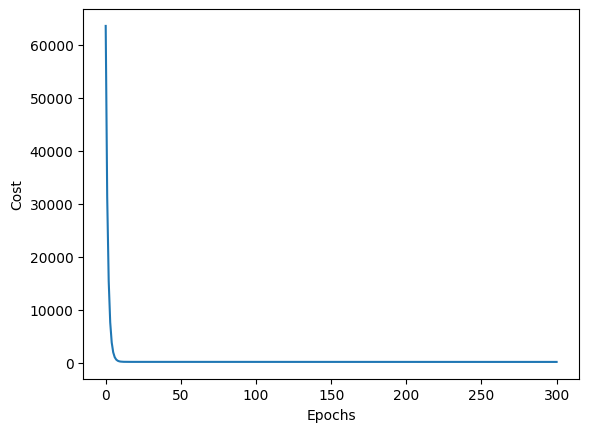

In [140]:
plt.plot(loss_hist)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

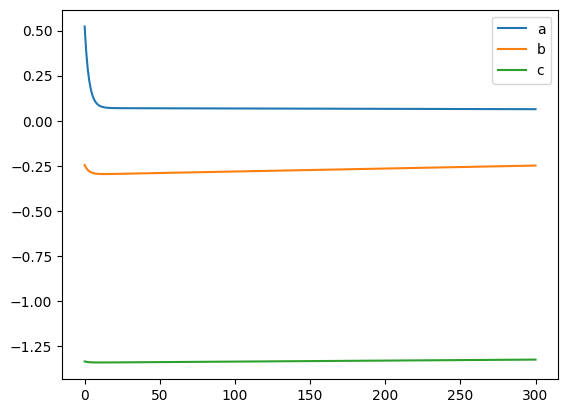

In [141]:
#plot the features over the epochs
plt.plot([i[0] for i in history], label='a')
plt.plot([i[1] for i in history], label='b')
plt.plot([i[2] for i in history], label='c')
plt.legend()


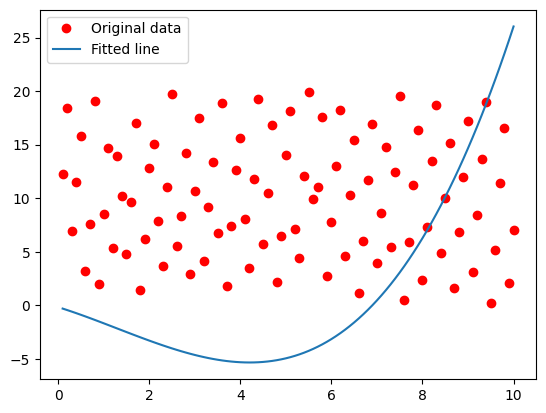

In [142]:
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, np.array(history[-1][0] * x * x * x + history[-1][1] * x * x + history[-1][2] * x + history[-1][3]), label='Fitted line')
plt.legend()

# Five features model

In [143]:
a = tf.Variable(tf.random.normal([1], dtype=tf.float32))
b = tf.Variable(tf.random.normal([1], dtype=tf.float32))
c = tf.Variable(tf.random.normal([1], dtype=tf.float32))
d = tf.Variable(tf.random.normal([1], dtype=tf.float32))
e = tf.Variable(tf.random.normal([1], dtype=tf.float32))

In [144]:
def quintic_model(x):
    return a * tf.pow(x, 4) + b * tf.pow(x, 3) + c * tf.pow(x, 2) + d * x + e

In [145]:
def gradient_descent_five(x, y, a, b, c, d, e, lr, epochs):
    loss_hist = []
    history = []
    for i in range(epochs + 1):
        with tf.GradientTape() as tape:
            y_pred = quintic_model(x)
            cost = loss_fn(y, y_pred)
        gradients = tape.gradient(cost, [a, b, c, d, e])
        a.assign_sub(lr * gradients[0])
        b.assign_sub(lr * gradients[1])
        c.assign_sub(lr * gradients[2])
        d.assign_sub(lr * gradients[3])
        e.assign_sub(lr * gradients[4])
        if i % 100 == 0:
            print("Epochs: %d, Cost: %.4f, a: %.4f, b: %.4f, c: %.4f, d: %.4f, e: %.4f" % (i, cost.numpy(), a.numpy(), b.numpy(), c.numpy(), d.numpy(), e.numpy()))
        loss_hist.append(cost.numpy())
        history.append([a.numpy(), b.numpy(), c.numpy(), d.numpy(), e.numpy()])
    return loss_hist, history

In [146]:
loss_hist, history = gradient_descent_five(x, y, a, b, c, d, e, 0.00000001 , 1000)

Epochs: 0, Cost: 23182146.0000, a: 1.0053, b: 0.8045, c: -0.8572, d: -1.7426, e: -0.1817
Epochs: 100, Cost: 250.7518, a: -0.0612, b: 0.6839, c: -0.8711, d: -1.7442, e: -0.1819
Epochs: 200, Cost: 249.5170, a: -0.0611, b: 0.6829, c: -0.8713, d: -1.7443, e: -0.1819
Epochs: 300, Cost: 248.2937, a: -0.0609, b: 0.6818, c: -0.8716, d: -1.7443, e: -0.1819
Epochs: 400, Cost: 247.0819, a: -0.0608, b: 0.6807, c: -0.8718, d: -1.7443, e: -0.1819
Epochs: 500, Cost: 245.8826, a: -0.0607, b: 0.6797, c: -0.8720, d: -1.7444, e: -0.1819
Epochs: 600, Cost: 244.6946, a: -0.0606, b: 0.6786, c: -0.8723, d: -1.7444, e: -0.1819
Epochs: 700, Cost: 243.5184, a: -0.0604, b: 0.6776, c: -0.8725, d: -1.7444, e: -0.1819
Epochs: 800, Cost: 242.3536, a: -0.0603, b: 0.6765, c: -0.8728, d: -1.7445, e: -0.1819
Epochs: 900, Cost: 241.2003, a: -0.0602, b: 0.6755, c: -0.8730, d: -1.7445, e: -0.1819
Epochs: 1000, Cost: 240.0585, a: -0.0601, b: 0.6745, c: -0.8733, d: -1.7445, e: -0.1819


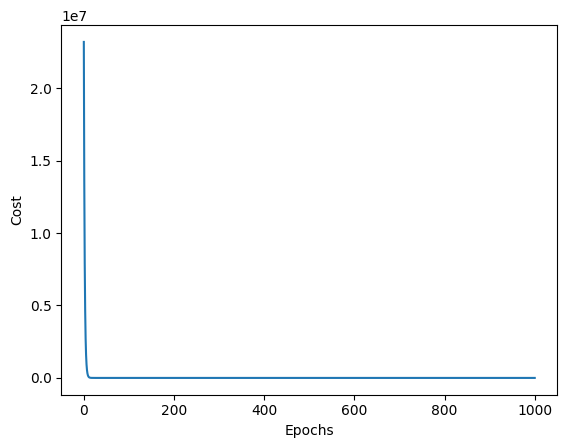

In [147]:
plt.plot(loss_hist)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

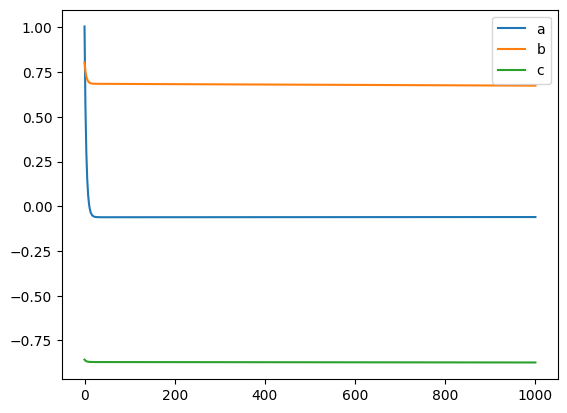

In [148]:
# plot the features over the epochs
plt.plot([i[0] for i in history], label='a')
plt.plot([i[1] for i in history], label='b')
plt.plot([i[2] for i in history], label='c')
plt.legend()

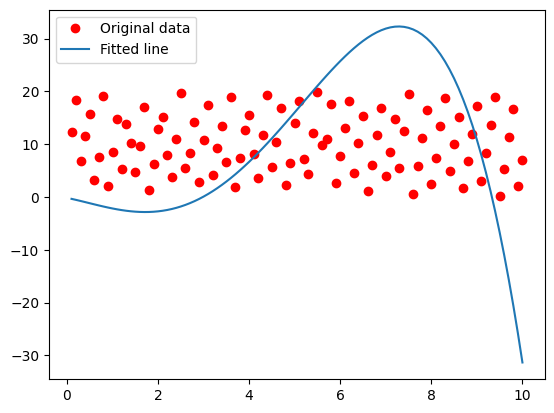

In [149]:
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, np.array(history[-1][0] * x * x * x * x + history[-1][1] * x * x * x + history[-1][2] * x * x + history[-1][3] * x + history[-1][4]), label='Fitted line')
plt.legend()
 